In [366]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
import numpy as np
import util

In [376]:
# carrega dataset em memoria
X, y = util.prepare_data()
X.drop(['Genero', 'Plataforma', 'Vendas Japao', 'Vendas America do Norte', 'Venda outros paises'], axis='columns', inplace=True)
X

(16598, 11)
(16265, 11)
removidos: 333
Plataforma possui 30 diferentes valores
Genero possui 11 diferentes valores
Editora possui 575 diferentes valores


,Ano,Editora,Vendas America do Norte,Vendas EUA,Vendas Japao,Venda outros paises,Vendas Totais
1,1985.0,359,29.08,3.58,6.81,0.77,40.24
2,2008.0,359,15.85,12.88,3.79,3.31,35.82
3,2009.0,359,15.75,11.01,3.28,2.96,33.00
4,1996.0,359,11.27,8.89,10.22,1.00,31.37
5,1989.0,359,23.20,2.26,4.22,0.58,30.26
...,...,...,...,...,...,...,...
16593,2002.0,269,0.01,0.00,0.00,0.00,0.01
16594,2003.0,241,0.01,0.00,0.00,0.00,0.01
16595,2008.0,21,0.00,0.00,0.00,0.00,0.01
16596,2010.0,8,0.00,0.01,0.00,0.00,0.01


In [368]:
# def apply_classification(column_name, breakpoints, times_hundred=True):
#     # busca o índice da coluna pelo nome
#     index = list(X.keys()).index(column_name)
    
#     # armazena todos os valores da coluna
#     column_values = X.iloc[:, index]
        
#     # talvez multiplica os valores por 100
#     if times_hundred:
#         column_values = list(map(lambda v: v * 100, column_values.values))
#     X.iloc[:, index] = util.ClassSpliter(column_name, *breakpoints).fit_transform(column_values)

# # configuração das categorizações de cada característica
# classifications = [
#     ('Ano', [(1997, None), (2016, 4)], False), # Ano min=1980 max=2020
#     ('Vendas America do Norte', [(0, None), (10, 2), (20, 5), (100, 20)]),  # Vendas America do Norte min=0 max=29.08
#     ('Vendas EUA', [(0, None), (10, 1), (15, None), (20, None), (50, None)]),  # Vendas EUA min=0 max=12.88
#     ('Vendas Japao', [(0, None), (1, None), (10, 3), (50, 10)]),  # Vendas Japao min=0 max=10.22
#     ('Venda outros paises', [(0, None), (1, None), (2, None), (3, None), (10, 3), (12, None)]),  # Venda outros paises min=0 max=10.57
#     ('Vendas Totais', [(14, 2), (30, 5), (100, 10), (150, None)]), # Vendas Totais min=0.01 max=40.24
# ]

# for content in classifications:
#     times_hundred = True
    
#     # adiciona a possibilidade de evitar o comportamento
#     # da multiplicação por 100
#     if len(content) == 3:
#         times_hundred = content[2]
#     apply_classification(content[0], content[1], times_hundred=times_hundred)
# X

,Ano,Editora,Vendas America do Norte,Vendas EUA,Vendas Japao,Venda outros paises,Vendas Totais
1,0,359,8,12,6,6,15
2,3,359,8,12,6,6,15
3,3,359,8,12,6,6,15
4,0,359,8,12,6,6,15
5,0,359,8,12,6,6,15
...,...,...,...,...,...,...,...
16593,2,269,1,0,0,0,0
16594,2,241,1,0,0,0,0
16595,3,21,0,0,0,0,0
16596,4,8,0,1,0,0,0


In [377]:
# normaliza as entradas
data = scale(X)
labels = LabelEncoder().fit_transform(y)

In [378]:
kmeans_kwargs = {
    'init': 'k-means++',
    'random_state': 42,
}

# descobre as somas das distâncias ao quadrado das amostras até o centro do cluster mais próximo
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs).fit(data)
    sse.append(kmeans.inertia_)
sse

[113847.99999999937,
 82004.91072868528,
 69070.7602536505,
 55779.09134459599,
 48323.39704360497,
 43734.48961910838,
 39940.518891870146,
 37538.3721273707,
 33677.12822930701,
 31508.813635432543]

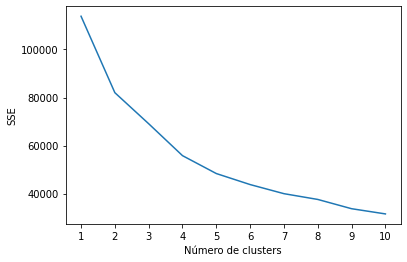

In [379]:
# mostra o gráfico com a curva elbow
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.show()

In [380]:
# descobre o "cotovelo" programaticamente
kneedle = KneeLocator(range(1, 11), sse, S=1.0, curve="convex", direction="decreasing")
kneedle.elbow

4

In [381]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_)
    silhouette_coefficients.append(score)
silhouette_coefficients

[0.8633425485850669,
 0.2955829049299586,
 0.31763836095084536,
 0.3343488883465005,
 0.34058526687337953,
 0.34080993684719474,
 0.2950897138217507,
 0.29428655488158256,
 0.296746695408743]

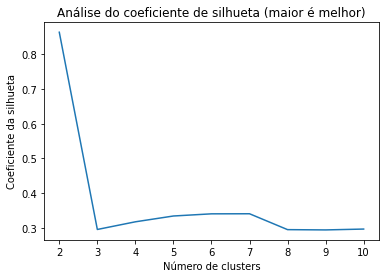

In [382]:
# mostra o gráfico com a curva dos resultados da silhueta
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel('Número de clusters')
plt.ylabel('Coeficiente da silhueta')
plt.title('Análise do coeficiente de silhueta (maior é melhor)')
plt.show()

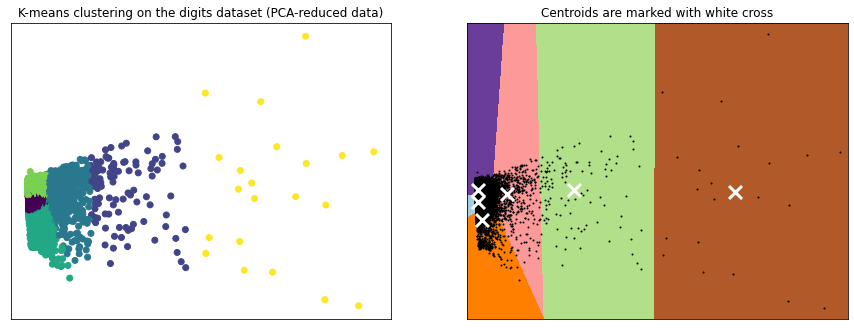

In [383]:
# usei partes do código dessa demo, com algumas alterações, para visualização
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

# define o numero de clusters
n_clusters = 6

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_clusters)
y_pred = kmeans.fit_predict(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(figsize=(15, 12))

plt.subplot(221)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y_pred)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)')
plt.xticks(())
plt.yticks(())

plt.subplot(222)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()